-------------------------------------------------------------------------------------------------------
# SCENARIO ANALYSIS: 
-------------------------------------------------------------------------------------------------------
## Baseline + Basic, Moderate, and Advanced Retrofit
## No IRA and IRA-Reference
-------------------------------------------------------------------------------------------------------

In [1]:
print("""
=====================================================================================================================================================================
SCENARIO ANALYSIS:
Baseline + Basic, Moderate, and Advanced Retrofit
No IRA and IRA-Reference Scenarios
=====================================================================================================================================================================
Baseline Scenario: Existing U.S. Housing Stock in 2018
      
Retrofit Scenarios:
- Basic Retrofit (MP8)
- Moderate Retrofit (MP9)
- Advanced Retrofit (MP10)

No IRA Scenario:
- AEO2023 No Inflation Reduction Act
- Cambium 2021 MidCase
      
IRA-Reference Scenario:
- AEO2023 REFERENCE CASE - HDD and Fuel Price Projections
- Cambium 2022 and 2023 MidCase

----------------------------------------------------------------------------------------------
""", "\n")


SCENARIO ANALYSIS:
Baseline + Basic, Moderate, and Advanced Retrofit
No IRA and IRA-Reference Scenarios
Baseline Scenario: Existing U.S. Housing Stock in 2018

Retrofit Scenarios:
- Basic Retrofit (MP8)
- Moderate Retrofit (MP9)
- Advanced Retrofit (MP10)

No IRA Scenario:
- AEO2023 No Inflation Reduction Act
- Cambium 2021 MidCase

IRA-Reference Scenario:
- AEO2023 REFERENCE CASE - HDD and Fuel Price Projections
- Cambium 2022 and 2023 MidCase

----------------------------------------------------------------------------------------------
 



In [2]:
from config import PROJECT_ROOT
print(f"Imported PROJECT_ROOT from config.py: {PROJECT_ROOT}")

from datetime import datetime

# Get the current datetime
# Start the timer
start_time = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

# Format the name of the exported results file using the location ID
result_export_time = datetime.now()
model_run_date_time = result_export_time.strftime("%Y-%m-%d_%H-%M")

Project root directory: c:\users\14128\research\cmu-tare-model
Imported PROJECT_ROOT from config.py: c:\users\14128\research\cmu-tare-model


In [3]:
import os
from IPython import get_ipython

import pandas as pd

# Data Visualization Functions
from cmu_tare_model.utils.data_visualization import *

# Matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
plt.rcParams['font.family'] = 'sans-serif' # Set the font for Matplotlib
plt.rcParams['font.sans-serif'] = 'Arial' # Set the font for Matplotlib

# At the beginning of your notebook or script
plt.close('all')  # Close any existing figures before creating new ones
# For Jupyter notebooks, ensure you have this at the top
%matplotlib inline

# Seaborn
import seaborn as sns
sns.set_theme(font='sans-serif', style='darkgrid') # Set the font and grid style for Seaborn

In [4]:
# pd.set_option("display.max_columns", None)
# pd.reset_option('display.max_columns')
# pd.set_option('display.max_rows', None)
# pd.reset_option('display.max_rows')

In [5]:
# Select whether to begin new run or visualize existing model outputs
while True:
    try:
        start_new_model_run = str(input("""
Would you like to begin a new simulation or visualize output results from a previous model run? Please enter one of the following:
Y. I'd like to start a new model run.
N. I'd like to visualize output results from a previous model run.""")).upper()

        print(f"Enter the following input: {start_new_model_run}")

        if start_new_model_run == 'Y':
            print(f"Formatted date for use in file name: {model_run_date_time}")

            print(f"Project root directory: {PROJECT_ROOT}")

            # Relative path to the file from the project root
            relative_path = os.path.join("cmu_tare_model", "model_scenarios", "tare_run_simulation_v2_1.ipynb")

            # Construct the absolute path to the file
            file_path = os.path.join(PROJECT_ROOT, relative_path)
            print(f"File path: {file_path}")

            # Storing Result Outputs in output_results folder
            output_folder_path = os.path.join(PROJECT_ROOT, "cmu_tare_model", "output_results")
            print(f"Result outputs will be exported here: {output_folder_path}")

            # On Windows, to avoid any path-escape quirks, convert backslashes to forward slashes
            file_path = file_path.replace("\\", "/")

            print(f"Running file: {file_path}")

            # iPthon magic command to run a .py file and import variables into the current IPython session
            if os.path.exists(file_path):
                get_ipython().run_line_magic('run', f'-i {file_path}')  # If your path has NO spaces, no quotes needed.
            else:
                print(f"File not found: {file_path}")

            break  # Exit the loop if input is 'Y'
            
        elif start_new_model_run == 'N':
            # Enter the date time of the model run in the following format: YYYY-MM-DD_HH-MM
            model_run_date_time = str(input("Enter the date time of the model run in the following format YYYY-MM-DD_HH-MM: "))
            print(f"Project root directory: {PROJECT_ROOT}")
            
            # Storing Result Outputs in output_results folder
            output_folder_path = os.path.join(PROJECT_ROOT, "cmu_tare_model", "output_results")
            print(f"Result outputs will be exported here: {output_folder_path}")
            
            break  # Exit the loop if input is 'N'
        
        else:
            print("Invalid input. Please enter 'Y' or 'N'.")
    
    # except Exception as e:
    #     print("Invalid input. Please try again.")

    except Exception as e:
        print("An error occurred:", e)
        print("Please try again.")


Enter the following input: Y
Formatted date for use in file name: 2025-10-23_19-15
Project root directory: c:\users\14128\research\cmu-tare-model
File path: c:\users\14128\research\cmu-tare-model\cmu_tare_model\model_scenarios\tare_run_simulation_v2_1.ipynb
Result outputs will be exported here: c:\users\14128\research\cmu-tare-model\cmu_tare_model\output_results
Running file: c:/users/14128/research/cmu-tare-model/cmu_tare_model/model_scenarios/tare_run_simulation_v2_1.ipynb

The results will be exported using the export_model_run_output function.
Documentation for this function:
Export data for various result categories to appropriate directories.
    
    This function exports DataFrame results to CSV files in the appropriate 
    directory based on the results category and measure package. It supports
    the expanded sensitivity analysis categories and directory structure.
    
    Args:
        df_results_export: DataFrame containing the data to be exported.
        results_catego

In [6]:
# =======================================================================================================
# LOAD SCENARIO DATA: ORIGINAL APPROACH FOR REFERENCE (MP8)
# =======================================================================================================
# scenario_string = 'retrofit_basic_summary'
# df_outputs_basic_home = load_scenario_data('Whole-Home', output_folder_path, scenario_string, model_run_date_time, columns_to_string)
# df_outputs_basic_heating = load_scenario_data('Heating', output_folder_path, scenario_string, model_run_date_time, columns_to_string)
# ... and so on
from cmu_tare_model.utils.load_exported_results_to_df import load_scenario_data

print(f"""
====================================================================================================================================================================
LOAD SCENARIO DATA
====================================================================================================================================================================
The load_scenario_data function loads scenario data from a specified folder and date. Additional details are provided below:
      
Documentation for the load_scenario_data function:
{load_scenario_data.__doc__}

-----------------------------------------------------------------------------------------------
LOADING SCENARIO DATA ...

These parameters are common to all function calls:
Output folder path: {output_folder_path}
Model run date time: {model_run_date_time}
""")


LOAD SCENARIO DATA
The load_scenario_data function loads scenario data from a specified folder and date. Additional details are provided below:

Documentation for the load_scenario_data function:
Load scenario data from a specified folder and date.
    
    This function searches for files matching the given scenario and date
    in the specified folder path, and loads the first matching file as a
    pandas DataFrame. Includes optional chunked loading for memory efficiency
    when working with large datasets.
    
    Args:
        end_use: Description of the data being loaded (used for logging).
        output_folder_path: Base path where scenario folders are located.
        scenario_string: Path to the scenario data (can include subdirectories).
        model_run_date_time: Date/time string to filter files by (must be in filename).
        columns_to_string: Dictionary mapping column names/indices to string dtypes.
            Supports both string keys (column names) and integer 

-------------------------------------------------------------------------------------------------------
# Baseline Scenario: Measure Package 0 (MP0)
-------------------------------------------------------------------------------------------------------

In [7]:
# =======================================================================================================
# Baseline Scenario: Measure Package 0 (MP0)
# =======================================================================================================
columns_to_string = {16: str, 19: str, 20: str, 21: str}
menu_mp = 0

scenario_string = 'baseline_summary\summary_baseline'

print(f"""
=======================================================================================================
Baseline Scenario: Measure Package 0 (MP0)
=======================================================================================================
Scenario Relative Path: {scenario_string}
Loading data for Whole-Home, Heating, Water Heating, Clothes Drying, Cooking ...

""")
df_outputs_baseline_home = load_scenario_data('Whole-Home', output_folder_path, scenario_string, model_run_date_time, columns_to_string)
print(df_outputs_baseline_home)


Baseline Scenario: Measure Package 0 (MP0)
Scenario Relative Path: baseline_summary\summary_baseline
Loading data for Whole-Home, Heating, Water Heating, Clothes Drying, Cooking ...


Output Results Folder Path: c:\users\14128\research\cmu-tare-model\cmu_tare_model\output_results\baseline_summary\summary_baseline
Loading Whole-Home data in chunks of 50,000 rows...
  Successfully combined 1 chunks into DataFrame with shape (17990, 126)
Loaded Whole-Home data for policy_scenario 'baseline_summary\summary_baseline' 

         square_footage census_region  census_division census_division_recs  \
bldg_id                                                                       
15                333.0     Northeast  Middle Atlantic      Middle Atlantic   
79               1220.0     Northeast  Middle Atlantic      Middle Atlantic   
119              2152.0     Northeast  Middle Atlantic      Middle Atlantic   
122              2176.0     Northeast  Middle Atlantic      Middle Atlantic   
150  

-------------------------------------------------------------------------------------------------------
# Basic Retrofit: Measure Package 8 (MP8)
-------------------------------------------------------------------------------------------------------

In [8]:
# =======================================================================================================
# BASIC RETROFIT: MEASURE PACKAGE 8 (MP8) WITH HEALTH RCM-CRF SENSITIVITY 
# =======================================================================================================
# Common parameters
columns_to_string = {16: str, 19: str, 20: str, 21: str}
menu_mp=8

# ========================== BASIC-AP2  ========================== 
scenario_string = 'retrofit_basic_summary/summary_basic_ap2'

print(f"""
=======================================================================================================
BASIC RETROFIT: MEASURE PACKAGE 8 (MP8) WITH HEALTH RCM-CRF SENSITIVITY 
=======================================================================================================

------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: AP2
------------------------------------------------------------------------------------------------
Scenario Relative Path: {scenario_string}
Loading data for Whole-Home, Heating, Water Heating, Clothes Drying, Cooking ...

""")
df_outputs_basic_home_ap2 = load_scenario_data('Whole-Home', output_folder_path, scenario_string, model_run_date_time, columns_to_string)
print(df_outputs_basic_home_ap2)

# ========================== BASIC-EASIUR  ========================== 
scenario_string = 'retrofit_basic_summary/summary_basic_easiur'

print(f"""
------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: EASIUR
------------------------------------------------------------------------------------------------
Scenario Relative Path: {scenario_string}
Loading data for Whole-Home, Heating, Water Heating, Clothes Drying, Cooking ...

""")
df_outputs_basic_home_easiur = load_scenario_data('Whole-Home', output_folder_path, scenario_string, model_run_date_time, columns_to_string)
print(df_outputs_basic_home_easiur)

# ========================== BASIC-InMAP ========================== 
scenario_string = 'retrofit_basic_summary/summary_basic_inmap'

print(f"""
------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: InMAP
------------------------------------------------------------------------------------------------
Scenario Relative Path: {scenario_string}
Loading data for Whole-Home, Heating, Water Heating, Clothes Drying, Cooking ...

""")
df_outputs_basic_home_inmap = load_scenario_data('Whole-Home', output_folder_path, scenario_string, model_run_date_time, columns_to_string)
print(df_outputs_basic_home_inmap)


BASIC RETROFIT: MEASURE PACKAGE 8 (MP8) WITH HEALTH RCM-CRF SENSITIVITY 

------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: AP2
------------------------------------------------------------------------------------------------
Scenario Relative Path: retrofit_basic_summary/summary_basic_ap2
Loading data for Whole-Home, Heating, Water Heating, Clothes Drying, Cooking ...


Output Results Folder Path: c:\users\14128\research\cmu-tare-model\cmu_tare_model\output_results\retrofit_basic_summary/summary_basic_ap2
Loading Whole-Home data in chunks of 50,000 rows...
  Successfully combined 1 chunks into DataFrame with shape (15651, 770)
Loaded Whole-Home data for policy_scenario 'retrofit_basic_summary/summary_basic_ap2' 

         square_footage census_region  census_division census_division_recs  \
bldg_id                                                                       
119              2152.0     Northeast  Middle A

-------------------------------------------------------------------------------------------------------
# Moderate Retrofit: Measure Package 9 (MP9)
-------------------------------------------------------------------------------------------------------

In [9]:
# =======================================================================================================
# MODERATE RETROFIT: MEASURE PACKAGE 9 (MP9) WITH HEALTH RCM-CRF SENSITIVITY 
# =======================================================================================================
# Common parameters
columns_to_string = {16: str, 19: str, 20: str, 21: str}
menu_mp = 9

# ========================== MODERATE-AP2  ========================== 
scenario_string = 'retrofit_moderate_summary/summary_moderate_ap2'

print(f"""
=======================================================================================================
MODERATE RETROFIT: MEASURE PACKAGE 9 (MP9) WITH HEALTH RCM-CRF SENSITIVITY 
=======================================================================================================

------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: AP2
------------------------------------------------------------------------------------------------
Scenario Relative Path: {scenario_string}
Loading data for Whole-Home and Heating ...

""")
df_outputs_moderate_home_ap2 = load_scenario_data('Whole-Home', output_folder_path, scenario_string, model_run_date_time, columns_to_string)
print(df_outputs_moderate_home_ap2)

# ========================== MODERATE-EASIUR  ========================== 
scenario_string = 'retrofit_moderate_summary/summary_moderate_easiur'

print(f"""
------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: EASIUR
------------------------------------------------------------------------------------------------
Scenario Relative Path: {scenario_string}
Loading data for Whole-Home and Heating ...

""")
df_outputs_moderate_home_easiur = load_scenario_data('Whole-Home', output_folder_path, scenario_string, model_run_date_time, columns_to_string)
print(df_outputs_moderate_home_easiur)

# ========================== MODERATE-InMAP ========================== 
scenario_string = 'retrofit_moderate_summary/summary_moderate_inmap'

print(f"""
------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: InMAP
------------------------------------------------------------------------------------------------
Scenario Relative Path: {scenario_string}
Loading data for Whole-Home and Heating ...

""")
df_outputs_moderate_home_inmap = load_scenario_data('Whole-Home', output_folder_path, scenario_string, model_run_date_time, columns_to_string)
print(df_outputs_moderate_home_inmap)


MODERATE RETROFIT: MEASURE PACKAGE 9 (MP9) WITH HEALTH RCM-CRF SENSITIVITY 

------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: AP2
------------------------------------------------------------------------------------------------
Scenario Relative Path: retrofit_moderate_summary/summary_moderate_ap2
Loading data for Whole-Home and Heating ...


Output Results Folder Path: c:\users\14128\research\cmu-tare-model\cmu_tare_model\output_results\retrofit_moderate_summary/summary_moderate_ap2
Loading Whole-Home data in chunks of 50,000 rows...
  Successfully combined 1 chunks into DataFrame with shape (15651, 786)
Loaded Whole-Home data for policy_scenario 'retrofit_moderate_summary/summary_moderate_ap2' 

         square_footage census_region  census_division census_division_recs  \
bldg_id                                                                       
119              2152.0     Northeast  Middle Atlantic      Mid

-------------------------------------------------------------------------------------------------------
# Advanced Retrofit: Measure Package 10 (MP10)
-------------------------------------------------------------------------------------------------------

In [10]:
# =======================================================================================================
# ADVANCED RETROFIT: MEASURE PACKAGE 10 (MP10) WITH HEALTH RCM-CRF SENSITIVITY 
# =======================================================================================================
# Common parameters
columns_to_string = {16: str, 19: str, 20: str, 21: str, 159: str}
menu_mp = 10

# ========================== ADVANCED-AP2  ========================== 
scenario_string = 'retrofit_advanced_summary/summary_advanced_ap2'

print(f"""
=======================================================================================================
ADVANCED RETROFIT: MEASURE PACKAGE 10 (MP10) WITH HEALTH RCM-CRF SENSITIVITY 
=======================================================================================================

------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: AP2
------------------------------------------------------------------------------------------------
Scenario Relative Path: {scenario_string}
Loading data for Whole-Home and Heating ...

""")
df_outputs_advanced_home_ap2 = load_scenario_data('Whole-Home', output_folder_path, scenario_string, model_run_date_time, columns_to_string)
print(df_outputs_advanced_home_ap2)

# ========================== ADVANCED-EASIUR  ========================== 
scenario_string = 'retrofit_advanced_summary/summary_advanced_easiur'

print(f"""
------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: EASIUR
------------------------------------------------------------------------------------------------
Scenario Relative Path: {scenario_string}
Loading data for Whole-Home and Heating ...

""")
df_outputs_advanced_home_easiur = load_scenario_data('Whole-Home', output_folder_path, scenario_string, model_run_date_time, columns_to_string)
print(df_outputs_advanced_home_easiur)

# ========================== ADVANCED-InMAP ========================== 
scenario_string = 'retrofit_advanced_summary/summary_advanced_inmap'

print(f"""
------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: InMAP
------------------------------------------------------------------------------------------------
Scenario Relative Path: {scenario_string}
Loading data for Whole-Home and Heating ...

""")
df_outputs_advanced_home_inmap = load_scenario_data('Whole-Home', output_folder_path, scenario_string, model_run_date_time, columns_to_string)
print(df_outputs_advanced_home_inmap)


ADVANCED RETROFIT: MEASURE PACKAGE 10 (MP10) WITH HEALTH RCM-CRF SENSITIVITY 

------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: AP2
------------------------------------------------------------------------------------------------
Scenario Relative Path: retrofit_advanced_summary/summary_advanced_ap2
Loading data for Whole-Home and Heating ...


Output Results Folder Path: c:\users\14128\research\cmu-tare-model\cmu_tare_model\output_results\retrofit_advanced_summary/summary_advanced_ap2
Loading Whole-Home data in chunks of 50,000 rows...
  Successfully combined 1 chunks into DataFrame with shape (15651, 801)
Loaded Whole-Home data for policy_scenario 'retrofit_advanced_summary/summary_advanced_ap2' 

         square_footage census_region  census_division census_division_recs  \
bldg_id                                                                       
119              2152.0     Northeast  Middle Atlantic      M

# Adoption Rate Scenario Comparison

In [11]:
from cmu_tare_model.adoption_potential.determine_adoption_potential_sensitivity_robust import * 
from cmu_tare_model.adoption_potential.data_processing.visuals_adoption_potential import (
    create_multiIndex_adoption_df,
    print_adoption_decision_percentages,
    subplot_grid_adoption_vBar
)

print(f"""  
====================================================================================================================================================================
ADOPTION POTENTIAL VISUALIZATION
====================================================================================================================================================================

--------------------------------------------------------
ADOPTION POTENTIAL
--------------------------------------------------------
determine_adoption_potential_sensitivity_robust.py file contains the definitions for:
- adoption_decision function (combined climate + health analysis)
- calculate_climate_only_adoption_robust function (climate-only analysis)
- calculate_health_only_adoption_robust function (health-only analysis)
      
Documentation for the adoption_decision function:
{adoption_decision.__doc__}

Documentation for the calculate_climate_only_adoption_robust function:
{calculate_climate_only_adoption_robust.__doc__}

Documentation for the calculate_health_only_adoption_robust function:
{calculate_health_only_adoption_robust.__doc__}
--------------------------------------------------------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------
CREATE MULTI-INDEX DF FOR ADOPTION POTENTIAL
--------------------------------------------------------
visuals_adoption_potential.py file contains the definition for the create_multiIndex_adoption_df function.

Documentation for the create_multiIndex_adoption_df function:
{create_multiIndex_adoption_df.__doc__}
--------------------------------------------------------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------
VISUALIZE ADOPTION POTENTIAL SUBPLOT GRID
--------------------------------------------------------
visuals_adoption_potential.py file contains the definition for the subplot_grid_adoption_vBar function.
      
Documentation for the subplot_grid_adoption_vBar function:
{subplot_grid_adoption_vBar.__doc__}
--------------------------------------------------------------------------------------------------------------------------------------------------------------------

""")

  
ADOPTION POTENTIAL VISUALIZATION

--------------------------------------------------------
ADOPTION POTENTIAL
--------------------------------------------------------
determine_adoption_potential_sensitivity_robust.py file contains the definitions for:
- adoption_decision function (combined climate + health analysis)
- calculate_climate_only_adoption_robust function (climate-only analysis)
- calculate_health_only_adoption_robust function (health-only analysis)

Documentation for the adoption_decision function:

    Updates DataFrame with adoption decisions and public impacts based on NPV analysis.
    
    Simplified output for nation-level analysis while maintaining full functionality.
    
    Args:
        df: DataFrame containing home equipment data.
        menu_mp: Measure package identifier.
        policy_scenario: Policy scenario for electricity grid projections.
            Accepted values: 'No Inflation Reduction Act', 'AEO2023 Reference Case'.
        rcm_model: RCM mode

## Space Heating - Basic (MP8), Moderate (MP9), Advanced (MP10) Retrofit


In [12]:
# =======================================================================================================
# SPACE HEATING ADOPTION POTENTIAL (MP8, MP9, MP10): HEALTH RCM-CRF SENSITIVITY
# =======================================================================================================
# Common parameters
scc = 'central'

# ========================== AP2  ========================== 
rcm_model = 'ap2'

print(f"""
Adoption Potential Summary Dataframes are then used to create Multi-Index Dataframes for the following:
- Retrofit Scenarios: Basic (MP8), Moderate (MP9), Advanced (MP10)
- SCC Climate Sensitivity: {scc}
- Health Sensitivity (RCM): AP2, EASIUR, InMAP
- Health Sensitivity (CR Function): 'acs' or 'h6c'

------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: AP2
------------------------------------------------------------------------------------------------
SCC Climate Sensitivity: {scc}
Health RCM Model: {rcm_model}
Health CR Function: 'acs' or 'h6c'

Creating Multi-Index Dataframes for Space Heating - Basic (MP8), Moderate (MP9), Advanced (MP10) Retrofit ...

""")
# Basic Retrofit (MP8)
df_mi_basic_heating_adoption_ap2_acs = create_multiIndex_adoption_df(df_outputs_basic_home_ap2, 8, 'heating', scc, rcm_model, 'acs')
df_mi_basic_heating_adoption_ap2_h6c = create_multiIndex_adoption_df(df_outputs_basic_home_ap2, 8, 'heating', scc, rcm_model, 'h6c')
# Moderate Retrofit (MP9)
df_mi_moderate_heating_adoption_ap2_acs = create_multiIndex_adoption_df(df_outputs_moderate_home_ap2, 9, 'heating', scc, rcm_model, 'acs')
df_mi_moderate_heating_adoption_ap2_h6c = create_multiIndex_adoption_df(df_outputs_moderate_home_ap2, 9, 'heating', scc, rcm_model, 'h6c')
# Advanced Retrofit (MP10)
df_mi_advanced_heating_adoption_ap2_acs = create_multiIndex_adoption_df(df_outputs_advanced_home_ap2, 10, 'heating', scc, rcm_model, 'acs')
df_mi_advanced_heating_adoption_ap2_h6c = create_multiIndex_adoption_df(df_outputs_advanced_home_ap2, 10, 'heating', scc, rcm_model, 'h6c')

# ========================== EASIUR  ========================== 
rcm_model = 'easiur'

print(f"""
------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: EASIUR
------------------------------------------------------------------------------------------------
SCC Climate Sensitivity: {scc}
Health RCM Model: {rcm_model}
Health CR Function: 'acs' or 'h6c'

Creating Multi-Index Dataframes for Space Heating - Basic (MP8), Moderate (MP9), Advanced (MP10) Retrofit ...

""")
# Basic Retrofit (MP8)
df_mi_basic_heating_adoption_easiur_acs = create_multiIndex_adoption_df(df_outputs_basic_home_easiur, 8, 'heating', scc, rcm_model, 'acs')
df_mi_basic_heating_adoption_easiur_h6c = create_multiIndex_adoption_df(df_outputs_basic_home_easiur, 8, 'heating', scc, rcm_model, 'h6c')
# Moderate Retrofit (MP9)
df_mi_moderate_heating_adoption_easiur_acs = create_multiIndex_adoption_df(df_outputs_moderate_home_easiur, 9, 'heating', scc, rcm_model, 'acs')
df_mi_moderate_heating_adoption_easiur_h6c = create_multiIndex_adoption_df(df_outputs_moderate_home_easiur, 9, 'heating', scc, rcm_model, 'h6c')
# Advanced Retrofit (MP10)
df_mi_advanced_heating_adoption_easiur_acs = create_multiIndex_adoption_df(df_outputs_advanced_home_easiur, 10, 'heating', scc, rcm_model, 'acs')
df_mi_advanced_heating_adoption_easiur_h6c = create_multiIndex_adoption_df(df_outputs_advanced_home_easiur, 10, 'heating', scc, rcm_model, 'h6c')

# ========================== InMAP ========================== 
rcm_model = 'inmap'

print(f"""
------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: InMAP
------------------------------------------------------------------------------------------------
SCC Climate Sensitivity: {scc}
Health RCM Model: {rcm_model}
Health CR Function: 'acs' or 'h6c'

Creating Multi-Index Dataframes for Space Heating - Basic (MP8), Moderate (MP9), Advanced (MP10) Retrofit ...

""")
# Basic Retrofit (MP8)
df_mi_basic_heating_adoption_inmap_acs = create_multiIndex_adoption_df(df_outputs_basic_home_inmap, 8, 'heating', scc, rcm_model, 'acs')
df_mi_basic_heating_adoption_inmap_h6c = create_multiIndex_adoption_df(df_outputs_basic_home_inmap, 8, 'heating', scc, rcm_model, 'h6c')
# Moderate Retrofit (MP9)
df_mi_moderate_heating_adoption_inmap_acs = create_multiIndex_adoption_df(df_outputs_moderate_home_inmap, 9, 'heating', scc, rcm_model, 'acs')
df_mi_moderate_heating_adoption_inmap_h6c = create_multiIndex_adoption_df(df_outputs_moderate_home_inmap, 9, 'heating', scc, rcm_model, 'h6c')
# Advanced Retrofit (MP10)
df_mi_advanced_heating_adoption_inmap_acs = create_multiIndex_adoption_df(df_outputs_advanced_home_inmap, 10, 'heating', scc, rcm_model, 'acs')
df_mi_advanced_heating_adoption_inmap_h6c = create_multiIndex_adoption_df(df_outputs_advanced_home_inmap, 10, 'heating', scc, rcm_model, 'h6c')


Adoption Potential Summary Dataframes are then used to create Multi-Index Dataframes for the following:
- Retrofit Scenarios: Basic (MP8), Moderate (MP9), Advanced (MP10)
- SCC Climate Sensitivity: central
- Health Sensitivity (RCM): AP2, EASIUR, InMAP
- Health Sensitivity (CR Function): 'acs' or 'h6c'

------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: AP2
------------------------------------------------------------------------------------------------
SCC Climate Sensitivity: central
Health RCM Model: ap2
Health CR Function: 'acs' or 'h6c'

Creating Multi-Index Dataframes for Space Heating - Basic (MP8), Moderate (MP9), Advanced (MP10) Retrofit ...



------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: EASIUR
------------------------------------------------------------------------------------------------
SCC Climate Sensitivity: central
Health RCM

In [13]:
df_mi_basic_heating_adoption_inmap_acs

preIRA_mp8_heating_adoption_central_inmap_acs  \
                                                          Tier 1: Feasible   
base_heating_fuel lmi_or_mui                                                 
Electricity       LMI                                                 32.0   
                  MUI                                                 40.0   
Fuel Oil          LMI                                                 16.0   
                  MUI                                                 15.0   
Natural Gas       LMI                                                  0.0   
                  MUI                                                  0.0   
Propane           LMI                                                 32.0   
                  MUI                                                 25.0   

                                                               \
                             Tier 2: Feasible vs. Alternative   
base_heating_fuel lmi_or_mui                                    
Electricity       LMI                                    32.0   
                  MUI                                    32.0   
Fuel Oil          LMI                                    25.0   
                  MUI                                    27.0   
Natural Gas       LMI                                     0.0   
                  MUI                                     0.0   
Propane           LMI                                    23.0   
                  MUI                                    27.0   

                                                                    \
                             Tier 3: Subsidy-Dependent Feasibility   
base_heating_fuel lmi_or_mui                                         
Electricity       LMI                                         31.0   
                  MUI                                         23.0   
Fuel Oil          LMI                                         54.0   
                  MUI                                         54.0   
Natural Gas       LMI                                         30.0   
                  MUI                                         28.0   
Propane           LMI                                         35.0   
                  MUI                                         40.0   

                                                       \
                             Total Adoption Potential   
base_heating_fuel lmi_or_mui                            
Electricity       LMI                            64.0   
                  MUI                            72.0   
Fuel Oil          LMI                            41.0   
                  MUI                            42.0   
Natural Gas       LMI                             0.0   
                  MUI                             0.0   
Propane           LMI                            55.0   
                  MUI                            52.0   

                                                                            \
                             Total Adoption Potential (Additional Subsidy)   
base_heating_fuel lmi_or_mui                                                 
Electricity       LMI                                                 95.0   
                  MUI                                                 95.0   
Fuel Oil          LMI                                                 95.0   
                  MUI                                                 96.0   
Natural Gas       LMI                                                 30.0   
                  MUI                                                 28.0   
Propane           LMI                                                 90.0   
                  MUI                                                 92.0   

                             iraRef_mp8_heating_adoption_central_inmap_acs  \
                                                          Tier 1: Feasible   
base_heating_fuel lmi_or_mui            

In [14]:
# I used this function call and the visual is still displaying income_level.

# ====================================================================
# 1. SPACE HEATING ADOPTION POTENTIAL (MP8, MP9, MP10): HEALTH RCM-CRF SENSITIVITY
# ====================================================================
scc = 'central'
rcm_model = 'inmap'
cr_function = 'acs'

# Assign to a variable to prevent duplicate display
fig_all_HVAC_inmap_acs = subplot_grid_adoption_vBar(
    dataframes=[
        df_mi_basic_heating_adoption_inmap_acs,
        df_mi_moderate_heating_adoption_inmap_acs, 
        df_mi_advanced_heating_adoption_inmap_acs
    ],
    scenarios_list=[
        [f'preIRA_mp8_heating_adoption_{scc}_{rcm_model}_{cr_function}',
         f'iraRef_mp8_heating_adoption_{scc}_{rcm_model}_{cr_function}'],
        [f'preIRA_mp9_heating_adoption_{scc}_{rcm_model}_{cr_function}',
         f'iraRef_mp9_heating_adoption_{scc}_{rcm_model}_{cr_function}'],
        [f'preIRA_mp10_heating_adoption_{scc}_{rcm_model}_{cr_function}',
         f'iraRef_mp10_heating_adoption_{scc}_{rcm_model}_{cr_function}']
    ],
    subplot_positions=[(0, 0), (0, 1), (0, 2)],
    filter_fuel=['Electricity', 'Natural Gas', 'Fuel Oil', 'Propane'],
    x_labels=["", "Fuel Type and Income Group (LMI: Low-to-Moderate-Income, MUI: Middle-to-Upper-Income)", ""],
    plot_titles=[
        "ASHP Only:\nNo IRA vs. IRA-Reference", 
        "ASHP + Basic Enclosure:\nNo IRA vs. IRA-Reference", 
        "ASHP + Enhanced Enclosure:\nNo IRA vs. IRA-Reference"
        ],
    y_labels=["Retrofit Adoption Potential (%)", "", ""],
    # suptitle=f"Space Heating Air-Source Heat Pump (ASHP) Retrofit Scenario Comparison\nClimate Sensitivity: SCC-{scc.upper()} | Health Sensitivity: {rcm_model.upper()}-{cr_function.upper()}",
    figure_size=(18, 12),
    sharey=True,
    x_tick_format="all"  # Use LMI/MUI classification for x-ticks
)
# fig_all_HVAC_inmap_acs

In [15]:
# I used this function call and the visual is still displaying income_level.

# ====================================================================
# 1. SPACE HEATING ADOPTION POTENTIAL (MP8, MP9, MP10): HEALTH RCM-CRF SENSITIVITY
# ====================================================================
scc = 'central'
rcm_model = 'inmap'
cr_function = 'acs'

# Assign to a variable to prevent duplicate display
fig_all_HVAC_inmap_acs = subplot_grid_adoption_vBar(
    dataframes=[
        df_mi_basic_heating_adoption_inmap_acs,
        df_mi_moderate_heating_adoption_inmap_acs, 
        df_mi_advanced_heating_adoption_inmap_acs
    ],
    scenarios_list=[
        [f'preIRA_mp8_heating_adoption_{scc}_{rcm_model}_{cr_function}',
         f'iraRef_mp8_heating_adoption_{scc}_{rcm_model}_{cr_function}'],
        [f'preIRA_mp9_heating_adoption_{scc}_{rcm_model}_{cr_function}',
         f'iraRef_mp9_heating_adoption_{scc}_{rcm_model}_{cr_function}'],
        [f'preIRA_mp10_heating_adoption_{scc}_{rcm_model}_{cr_function}',
         f'iraRef_mp10_heating_adoption_{scc}_{rcm_model}_{cr_function}']
    ],
    subplot_positions=[(0, 0), (0, 1), (0, 2)],
    filter_fuel=['Electricity', 'Natural Gas', 'Fuel Oil', 'Propane'],
    x_labels=["", "Fuel Type and Income Group (LMI: Low-to-Moderate-Income, MUI: Middle-to-Upper-Income)", ""],
    plot_titles=[
        "ASHP Only:\nNo IRA vs. IRA-Reference", 
        "ASHP + Basic Enclosure:\nNo IRA vs. IRA-Reference", 
        "ASHP + Enhanced Enclosure:\nNo IRA vs. IRA-Reference"
        ],
    y_labels=["Retrofit Adoption Potential (%)", "", ""],
    # suptitle=f"Space Heating Air-Source Heat Pump (ASHP) Retrofit Scenario Comparison\nClimate Sensitivity: SCC-{scc.upper()} | Health Sensitivity: {rcm_model.upper()}-{cr_function.upper()}",
    figure_size=(18, 12),
    sharey=True,
    x_tick_format="all"  # Use LMI/MUI classification for x-ticks
)
# fig_all_HVAC_inmap_acs

In [16]:
print_adoption_decision_percentages(
        dataframes=[
            df_mi_basic_heating_adoption_inmap_acs, df_mi_basic_heating_adoption_inmap_acs,
            ],
        scenario_names=[
            f'preIRA_mp8_heating_adoption_{scc}_{rcm_model}_{cr_function}',
            f'iraRef_mp8_heating_adoption_{scc}_{rcm_model}_{cr_function}',
            ],
        title="SPACE HEATING ADOPTION POTENTIAL (MP8, MP9, MP10): HEALTH RCM-CRF SENSITIVITY", 
        subtitle="ASHP Only:\nNo IRA vs. IRA-Reference",
        print_header_key=True,
    )

print_adoption_decision_percentages(
        dataframes=[
            df_mi_moderate_heating_adoption_inmap_acs, df_mi_moderate_heating_adoption_inmap_acs,
            ],
        scenario_names=[
            f'preIRA_mp9_heating_adoption_{scc}_{rcm_model}_{cr_function}',
            f'iraRef_mp9_heating_adoption_{scc}_{rcm_model}_{cr_function}',
            ],
        title=None,
        subtitle="ASHP + Basic Enclosure:\nNo IRA vs. IRA-Reference",
        print_header_key=False,
    )

print_adoption_decision_percentages(
        dataframes=[
            df_mi_advanced_heating_adoption_inmap_acs, df_mi_advanced_heating_adoption_inmap_acs
            ],
        scenario_names=[
            f'preIRA_mp10_heating_adoption_{scc}_{rcm_model}_{cr_function}',
            f'iraRef_mp10_heating_adoption_{scc}_{rcm_model}_{cr_function}'
            ],
        title=None,
        subtitle="ASHP + Enhanced Enclosure:\nNo IRA vs. IRA-Reference",
        print_header_key=False,
    )

--------------------------------------------------------------------------------
SPACE HEATING ADOPTION POTENTIAL (MP8, MP9, MP10): HEALTH RCM-CRF SENSITIVITY
--------------------------------------------------------------------------------
(Base Fuel, Income Level): 
    AD (%):   --> Tier 1 (%): Adopters that recover the total capital cost of retrofit
    TAD (%):  --> Tier 1+2 (%): Adopters that recover either the total or net capital cost of retrofit
    TADS (%): --> Tier 1+2+3 (%): Both less and more WTP Adopters plus those that require subsidies to adopt (positive total NPV)
    

ASHP ONLY:
NO IRA VS. IRA-REFERENCE

Scenarios: preIRA_mp8_heating_adoption_central_inmap_acs | iraRef_mp8_heating_adoption_central_inmap_acs
--------------------------------------------------------------------------------
('Overall'): AD 20%, TAD 41%, TADS 78% | AD 34%, TAD 54%, TADS 86%
('Electricity', 'LMI'): AD 32%, TAD 64%, TADS 95% | AD 70%, TAD 94%, TADS 100%
('Electricity', 'MUI'): AD 40%, TAD 7

## Water Heating, Clothes Drying, and Cooking - Basic Retrofit (MP8)

In [17]:
# =======================================================================================================
# BASIC RETROFIT: MEASURE PACKAGE 8 (MP8) WITH HEALTH RCM-CRF SENSITIVITY 
# =======================================================================================================
# Common parameters
menu_mp=8
scc = 'central'

# ========================== BASIC-AP2 ========================== 
rcm_model = 'ap2'

print(f"""
=======================================================================================================
BASIC RETROFIT: MEASURE PACKAGE 8 (MP8) WITH HEALTH RCM-CRF SENSITIVITY 
=======================================================================================================

------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: ap2_acs, ap2_h6c
------------------------------------------------------------------------------------------------
SCC Climate Sensitivity: {scc}
Health RCM Model: {rcm_model}
Health CR Function: 'acs' or 'h6c'

Creating Multi-Index Dataframes for Water Heating, Clothes Drying, Cooking ...

""")
df_mi_basic_waterHeating_adoption_ap2_acs = create_multiIndex_adoption_df(df_outputs_basic_home_ap2, menu_mp, 'waterHeating', scc, rcm_model, 'acs')
df_mi_basic_waterHeating_adoption_ap2_h6c = create_multiIndex_adoption_df(df_outputs_basic_home_ap2, menu_mp, 'waterHeating', scc, rcm_model, 'h6c')

df_mi_basic_clothesDrying_adoption_ap2_acs = create_multiIndex_adoption_df(df_outputs_basic_home_ap2, menu_mp, 'clothesDrying', scc, rcm_model, 'acs')
df_mi_basic_clothesDrying_adoption_ap2_h6c = create_multiIndex_adoption_df(df_outputs_basic_home_ap2, menu_mp, 'clothesDrying', scc, rcm_model, 'h6c')

df_mi_basic_cooking_adoption_ap2_acs = create_multiIndex_adoption_df(df_outputs_basic_home_ap2, menu_mp, 'cooking', scc, rcm_model, 'acs')
df_mi_basic_cooking_adoption_ap2_h6c = create_multiIndex_adoption_df(df_outputs_basic_home_ap2, menu_mp, 'cooking', scc, rcm_model, 'h6c')


# ========================== BASIC-EASIUR ========================== 
rcm_model = 'easiur'

print(f"""
------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: EASIUR
------------------------------------------------------------------------------------------------
SCC Climate Sensitivity: {scc}
Health RCM Model: {rcm_model}
Health CR Function: 'acs' or 'h6c'

Creating Multi-Index Dataframes for Water Heating, Clothes Drying, Cooking ...

""")
df_mi_basic_waterHeating_adoption_easiur_acs = create_multiIndex_adoption_df(df_outputs_basic_home_easiur, menu_mp, 'waterHeating', scc, rcm_model, 'acs')
df_mi_basic_waterHeating_adoption_easiur_h6c = create_multiIndex_adoption_df(df_outputs_basic_home_easiur, menu_mp, 'waterHeating', scc, rcm_model, 'h6c')

df_mi_basic_clothesDrying_adoption_easiur_acs = create_multiIndex_adoption_df(df_outputs_basic_home_easiur, menu_mp, 'clothesDrying', scc, rcm_model, 'acs')
df_mi_basic_clothesDrying_adoption_easiur_h6c = create_multiIndex_adoption_df(df_outputs_basic_home_easiur, menu_mp, 'clothesDrying', scc, rcm_model, 'h6c')

df_mi_basic_cooking_adoption_easiur_acs = create_multiIndex_adoption_df(df_outputs_basic_home_easiur, menu_mp, 'cooking', scc, rcm_model, 'acs')
df_mi_basic_cooking_adoption_easiur_h6c = create_multiIndex_adoption_df(df_outputs_basic_home_easiur, menu_mp, 'cooking', scc, rcm_model, 'h6c')


# ========================== BASIC-InMAP ========================== 
rcm_model = 'inmap'

print(f"""
------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: InMAP
------------------------------------------------------------------------------------------------
SCC Climate Sensitivity: {scc}
Health RCM Model: {rcm_model}
Health CR Function: 'acs' or 'h6c'

Creating Multi-Index Dataframes for Water Heating, Clothes Drying, Cooking ...

""")
df_mi_basic_waterHeating_adoption_inmap_acs = create_multiIndex_adoption_df(df_outputs_basic_home_inmap, menu_mp, 'waterHeating', scc, rcm_model, 'acs')
df_mi_basic_waterHeating_adoption_inmap_h6c = create_multiIndex_adoption_df(df_outputs_basic_home_inmap, menu_mp, 'waterHeating', scc, rcm_model, 'h6c')

df_mi_basic_clothesDrying_adoption_inmap_acs = create_multiIndex_adoption_df(df_outputs_basic_home_inmap, menu_mp, 'clothesDrying', scc, rcm_model, 'acs')
df_mi_basic_clothesDrying_adoption_inmap_h6c = create_multiIndex_adoption_df(df_outputs_basic_home_inmap, menu_mp, 'clothesDrying', scc, rcm_model, 'h6c')

df_mi_basic_cooking_adoption_inmap_acs = create_multiIndex_adoption_df(df_outputs_basic_home_inmap, menu_mp, 'cooking', scc, rcm_model, 'acs')
df_mi_basic_cooking_adoption_inmap_h6c = create_multiIndex_adoption_df(df_outputs_basic_home_inmap, menu_mp, 'cooking', scc, rcm_model, 'h6c')


BASIC RETROFIT: MEASURE PACKAGE 8 (MP8) WITH HEALTH RCM-CRF SENSITIVITY 

------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: ap2_acs, ap2_h6c
------------------------------------------------------------------------------------------------
SCC Climate Sensitivity: central
Health RCM Model: ap2
Health CR Function: 'acs' or 'h6c'

Creating Multi-Index Dataframes for Water Heating, Clothes Drying, Cooking ...



------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIVITY: EASIUR
------------------------------------------------------------------------------------------------
SCC Climate Sensitivity: central
Health RCM Model: easiur
Health CR Function: 'acs' or 'h6c'

Creating Multi-Index Dataframes for Water Heating, Clothes Drying, Cooking ...



------------------------------------------------------------------------------------------------
RCM HEALTH SENSITIV

In [18]:
# UPDATED TO SORT BY ADOPTION POTENTIAL PERCENTAGE
# ====================================================================
# 1. EQUIPMENT COMPARISON: Water Heating, Clothes Drying, Cooking - Basic Retrofit (MP8)
# ====================================================================
scc = 'central'
rcm_model = 'inmap'
cr_function = 'acs'

# Assign to a variable to prevent duplicate display
fig_mp8_nonHVAC_inmap_acs_fuelIncome = subplot_grid_adoption_vBar(
    dataframes=[
        df_mi_basic_waterHeating_adoption_inmap_acs,
        df_mi_basic_clothesDrying_adoption_inmap_acs, 
        df_mi_basic_cooking_adoption_inmap_acs
    ],
    scenarios_list=[
        [f'preIRA_mp8_waterHeating_adoption_{scc}_{rcm_model}_{cr_function}',
         f'iraRef_mp8_waterHeating_adoption_{scc}_{rcm_model}_{cr_function}'],
        [f'preIRA_mp8_clothesDrying_adoption_{scc}_{rcm_model}_{cr_function}',
         f'iraRef_mp8_clothesDrying_adoption_{scc}_{rcm_model}_{cr_function}'],
        [f'preIRA_mp8_cooking_adoption_{scc}_{rcm_model}_{cr_function}',
         f'iraRef_mp8_cooking_adoption_{scc}_{rcm_model}_{cr_function}']
    ],
    subplot_positions=[(0, 0), (0, 1), (0, 2)],
    filter_fuel=['Electricity', 'Natural Gas', 'Fuel Oil', 'Propane'],
    x_labels=["", "Fuel Type and Income Group (LMI: Low-to-Moderate-Income, MUI: Middle-to-Upper-Income)", ""],
    plot_titles=[
        "Heat Pump Water Heater:\nNo IRA vs. IRA-Reference",
        "Heat Pump Clothes Dryer:\nNo IRA vs. IRA-Reference",
        "Electric Resistance Range:\nNo IRA vs. IRA-Reference"
    ],
    y_labels=["Retrofit Adoption Potential (%)", "", ""],
    # suptitle=f"Basic Retrofit (MP8): High-Efficiency Equipment Electrification\nClimate Sensitivity: SCC-{scc.upper()} | Health Sensitivity: {rcm_model.upper()}-{cr_function.upper()}",
    figure_size=(18, 12),
    sharey=True,
    x_tick_format="all"  # Use LMI/MUI classification for x-ticks
)
# fig_mp8_nonHVAC_inmap_acs_fuelIncome

In [19]:
# I used this function call and the visual is still displaying income_level.

# ====================================================================
# 1. EQUIPMENT COMPARISON: Water Heating, Clothes Drying, Cooking - Basic Retrofit (MP8)
# ====================================================================
scc = 'central'
rcm_model = 'inmap'
cr_function = 'acs'

# Assign to a variable to prevent duplicate display
fig_mp8_nonHVAC_inmap_acs_fuelIncome = subplot_grid_adoption_vBar(
    dataframes=[
        df_mi_basic_waterHeating_adoption_inmap_acs,
        df_mi_basic_clothesDrying_adoption_inmap_acs, 
        df_mi_basic_cooking_adoption_inmap_acs
    ],
    scenarios_list=[
        [f'preIRA_mp8_waterHeating_adoption_{scc}_{rcm_model}_{cr_function}',
         f'iraRef_mp8_waterHeating_adoption_{scc}_{rcm_model}_{cr_function}'],
        [f'preIRA_mp8_clothesDrying_adoption_{scc}_{rcm_model}_{cr_function}',
         f'iraRef_mp8_clothesDrying_adoption_{scc}_{rcm_model}_{cr_function}'],
        [f'preIRA_mp8_cooking_adoption_{scc}_{rcm_model}_{cr_function}',
         f'iraRef_mp8_cooking_adoption_{scc}_{rcm_model}_{cr_function}']
    ],
    subplot_positions=[(0, 0), (0, 1), (0, 2)],
    filter_fuel=['Electricity', 'Natural Gas', 'Fuel Oil', 'Propane'],
    x_labels=["", "Fuel Type and Income Group (LMI: Low-to-Moderate-Income, MUI: Middle-to-Upper-Income)", ""],
    plot_titles=[
        "Heat Pump Water Heater:\nNo IRA vs. IRA-Reference",
        "Heat Pump Clothes Dryer:\nNo IRA vs. IRA-Reference",
        "Electric Resistance Range:\nNo IRA vs. IRA-Reference"
    ],
    y_labels=["Retrofit Adoption Potential (%)", "", ""],
    # suptitle=f"Basic Retrofit (MP8): High-Efficiency Equipment Electrification\nClimate Sensitivity: SCC-{scc.upper()} | Health Sensitivity: {rcm_model.upper()}-{cr_function.upper()}",
    figure_size=(18, 12),
    sharey=True,
    x_tick_format="all"  # Use LMI/MUI classification for x-ticks
)
# fig_mp8_nonHVAC_inmap_acs_fuelIncome

In [20]:
scc = 'central'
rcm_model = 'inmap'
cr_function = 'acs'

print_adoption_decision_percentages(
        dataframes=[
            df_mi_basic_waterHeating_adoption_inmap_acs, df_mi_basic_waterHeating_adoption_inmap_acs,
            ],
        scenario_names=[
            f'preIRA_mp8_waterHeating_adoption_{scc}_{rcm_model}_{cr_function}',
            f'iraRef_mp8_waterHeating_adoption_{scc}_{rcm_model}_{cr_function}',
            ],
        title="EQUIPMENT COMPARISON: Water Heating, Clothes Drying, Cooking - Basic Retrofit (MP8)",
        subtitle="Heat Pump Water Heater: Central SCC|InMAP|ACS",
        print_header_key=True,
    )

print_adoption_decision_percentages(
        dataframes=[
            df_mi_basic_clothesDrying_adoption_inmap_acs, df_mi_basic_clothesDrying_adoption_inmap_acs,
            ],
        scenario_names=[
            f'preIRA_mp8_clothesDrying_adoption_{scc}_{rcm_model}_{cr_function}',
            f'iraRef_mp8_clothesDrying_adoption_{scc}_{rcm_model}_{cr_function}',
            ],
        title=None,
        subtitle="Heat Pump Clothes Dryer: Central SCC|InMAP|ACS",
        print_header_key=False,
    )

print_adoption_decision_percentages(
        dataframes=[
            df_mi_basic_cooking_adoption_inmap_acs, df_mi_basic_cooking_adoption_inmap_acs
            ],
        scenario_names=[
            f'preIRA_mp8_cooking_adoption_{scc}_{rcm_model}_{cr_function}',
            f'iraRef_mp8_cooking_adoption_{scc}_{rcm_model}_{cr_function}'
            ],
        title=None,
        subtitle="Electric Resistance Range: Central SCC|InMAP|ACS",
        print_header_key=False,
    )

--------------------------------------------------------------------------------
EQUIPMENT COMPARISON: WATER HEATING, CLOTHES DRYING, COOKING - BASIC RETROFIT (MP8)
--------------------------------------------------------------------------------
(Base Fuel, Income Level): 
    AD (%):   --> Tier 1 (%): Adopters that recover the total capital cost of retrofit
    TAD (%):  --> Tier 1+2 (%): Adopters that recover either the total or net capital cost of retrofit
    TADS (%): --> Tier 1+2+3 (%): Both less and more WTP Adopters plus those that require subsidies to adopt (positive total NPV)
    

HEAT PUMP WATER HEATER: CENTRAL SCC|INMAP|ACS

Scenarios: preIRA_mp8_waterHeating_adoption_central_inmap_acs | iraRef_mp8_waterHeating_adoption_central_inmap_acs
--------------------------------------------------------------------------------
('Overall'): AD 41%, TAD 70%, TADS 98% | AD 58%, TAD 86%, TADS 100%
('Electricity', 'LMI'): AD 38%, TAD 65%, TADS 94% | AD 82%, TAD 99%, TADS 100%
('Electric

In [21]:
print(f""""
===================================================================================================================================================================
ADOPTION POTENTIAL DATAFRAMES
      
========== Heat Pump Water Heater (MP8): ==========

""")
df_mi_basic_waterHeating_adoption_inmap_acs

"
ADOPTION POTENTIAL DATAFRAMES

========== Heat Pump Water Heater (MP8): ==========




preIRA_mp8_waterHeating_adoption_central_inmap_acs  \
                                                                    Tier 1: Feasible   
base_waterHeating_fuel lmi_or_mui                                                      
Electricity            LMI                                                      38.0   
                       MUI                                                      54.0   
Fuel Oil               LMI                                                      35.0   
                       MUI                                                      49.0   
Natural Gas            LMI                                                       0.0   
                       MUI                                                       0.0   
Propane                LMI                                                      70.0   
                       MUI                                                      81.0   

                                                                    \
                                  Tier 2: Feasible vs. Alternative   
base_waterHeating_fuel lmi_or_mui                                    
Electricity            LMI                                    27.0   
                       MUI                                    26.0   
Fuel Oil               LMI                                    65.0   
                       MUI                                    50.0   
Natural Gas            LMI                                     7.0   
                       MUI                                    12.0   
Propane                LMI                                    30.0   
                       MUI                                    18.0   

                                                                         \
                                  Tier 3: Subsidy-Dependent Feasibility   
base_waterHeating_fuel lmi_or_mui                                         
Electricity            LMI                                         29.0   
                       MUI                                         18.0   
Fuel Oil               LMI                                          0.0   
                       MUI                                          1.0   
Natural Gas            LMI                                         86.0   
                       MUI                                         84.0   
Propane                LMI                                          1.0   
                       MUI                                          1.0   

                                                            \
                                  Total Adoption Potential   
base_waterHeating_fuel lmi_or_mui                            
Electricity            LMI                            65.0   
                       MUI                            80.0   
Fuel Oil               LMI                           100.0   
                       MUI                            99.0   
Natural Gas            LMI                             7.0   
                       MUI                            12.0   
Propane                LMI                           100.0   
                       MUI                            99.0   

                                                                                 \
                                  Total Adoption Potential (Additional Subsidy)   
base_waterHeating_fuel lmi_or_mui                                                 
Electricity            LMI                                                 94.0   
                       MUI                                                 98.0   
Fuel Oil               LMI                                                100.0   
                       MUI                                                100.0   
Natural Gas            LMI                                                 93.0   
                       MUI                                                 96.0   
Propane                LMI            

In [22]:
print(f""""
===================================================================================================================================================================
ADOPTION POTENTIAL DATAFRAMES
      
========== Heat Pump Water Heater (MP8): ==========
{df_mi_basic_waterHeating_adoption_inmap_acs},

========== Heat Pump Clothes Dryer (MP8): ==========
{df_mi_basic_clothesDrying_adoption_inmap_acs},

========== Electric Resistance Range (MP8): ==========
{df_mi_basic_cooking_adoption_inmap_acs}

====================================================================================================================================================================
""")

"
ADOPTION POTENTIAL DATAFRAMES

========== Heat Pump Water Heater (MP8): ==========
                                  preIRA_mp8_waterHeating_adoption_central_inmap_acs  \
                                                                    Tier 1: Feasible   
base_waterHeating_fuel lmi_or_mui                                                      
Electricity            LMI                                                      38.0   
                       MUI                                                      54.0   
Fuel Oil               LMI                                                      35.0   
                       MUI                                                      49.0   
Natural Gas            LMI                                                       0.0   
                       MUI                                                       0.0   
Propane                LMI                                                      70.0   
                       MUI         

# UNCERTAINTY ANALYSIS

In [23]:
from cmu_tare_model.utils.data_visualization import print_summary_stats
from cmu_tare_model.utils.data_visualization_boxplots import create_subplot_grid_boxplot
from cmu_tare_model.utils.data_visualization_histograms import create_subplot_grid_histogram, print_positive_percentages_complete

print(f"""  
====================================================================================================================================================================
UNCERTAINTY ANALYSIS VISUALIZATION
====================================================================================================================================================================

--------------------------------------------------------
SUMMARY STATISTICS TABLE
--------------------------------------------------------
data_visualization.py file contains the definition for the print_summary_stats function.
      
Documentation for the print_summary_stats function:
{print_summary_stats.__doc__}
--------------------------------------------------------------------------------------------------------------------------------------------------------------------


--------------------------------------------------------
SUBPLOT GRID OF BOXPLOTS
--------------------------------------------------------
data_visualization_boxplots.py file contains the definition for the create_subplot_grid_boxplot function.
      
Documentation for the create_subplot_grid_boxplot function:
{create_subplot_grid_boxplot.__doc__}
--------------------------------------------------------------------------------------------------------------------------------------------------------------------


--------------------------------------------------------
SUBPLOT GRID OF HISTOGRAMS
--------------------------------------------------------
data_visualization_histograms.py file contains the definition for the create_subplot_grid_histogram function.
      
Documentation for the create_subplot_grid_histogram function:
{create_subplot_grid_histogram.__doc__}
--------------------------------------------------------------------------------------------------------------------------------------------------------------------
""")

  
UNCERTAINTY ANALYSIS VISUALIZATION

--------------------------------------------------------
SUMMARY STATISTICS TABLE
--------------------------------------------------------
data_visualization.py file contains the definition for the print_summary_stats function.

Documentation for the print_summary_stats function:

    Print summary statistics for each specified column across single or multiple DataFrames,
    with optional breakdown by fuel type.
    
    Uses pandas .describe() to provide descriptive statistics (count, mean, std, min, 
    quartiles, max). Useful for understanding data distributions before creating histograms.
    
    Args:
        df: Single DataFrame for backward compatibility
        dataframes: List of DataFrames for multi-DataFrame analysis
        dataframe_indices: List of indices mapping columns to DataFrames
        column_names: List of column names to analyze
        subplot_titles: Optional list of display titles for each column
        percentiles: 

## Climate Change Impact (SCC) and Tier 3 Adopters

### Space Heating - Progressive Impact of Climate Benefit Valuation

In [24]:
# =======================================================================================================
# UNCERTAINTY ANALYSIS: CLIMATE BENEFIT IMPACT ON RETROFIT ADOPTION POTENTIAL (TIER 3)
# =======================================================================================================
# Health Damages Sensitivity Analysis
scenario_prefix = 'iraRef_mp8_'  # Adjust as needed for your data
category = 'heating'

fig_heating_climate_scc_uncertainty = create_subplot_grid_histogram(
    dataframes=[
        df_outputs_basic_home_ap2,
        df_outputs_basic_home_ap2,
        df_outputs_basic_home_ap2,
        df_outputs_basic_home_ap2
        ],
    subplot_positions=[(0, 0), (0, 1), (0, 2), (0, 3)],  # 1x4 grid
    x_cols=[
        f'{scenario_prefix}{category}_private_npv_moreWTP',
        f'{scenario_prefix}{category}_total_npv_climateOnly_lower',
        f'{scenario_prefix}{category}_total_npv_climateOnly_central',
        f'{scenario_prefix}{category}_total_npv_climateOnly_upper'
    ],
    x_labels=['Private NPV [2023 $USD]'] + ['Total NPV [2023 $USD]'] * 3,
    y_labels=['Dwelling Units', '', '', ''],
    bin_number=40,  # Optional: number of bins for histogram
    lower_percentile=0.5,    # Show nearly full range
    upper_percentile=99.5,   # Show nearly full range
    subplot_titles=[
        'Private NPV Only\n16% Positive NPV',
        'SCC Lower Bound\n24% Positive NPV',
        'SCC Central Estimate\n53% Positive NPV',
        'SCC Upper Bound\n67% Positive NPV' 
    ],
    # suptitle=f'{category.title()}: Progressive Impact of Climate Benefit Valuation',
    figure_size=(20, 10),  # Wide format for 4 panels
    sharex=False,  # Keep different scales to show full distributions
    sharey=True,   # Same y-scale for comparison
    color_code=f'base_{category}_fuel'
)


# Print comparison statistics
print("="*60)
print("PRIVATE vs PUBLIC NPV COMPARISON")
print("="*60)

print_positive_percentages_complete(
    df=df_outputs_basic_home_ap2,
    column_names=[
        f'{scenario_prefix}{category}_private_npv_moreWTP',              # Private baseline
        f'{scenario_prefix}{category}_total_npv_climateOnly_lower',
        f'{scenario_prefix}{category}_total_npv_climateOnly_central',
        f'{scenario_prefix}{category}_total_npv_climateOnly_upper'
    ],
    subplot_titles=[
        'Private NPV Only (Baseline)', 
        'Lower Bound SCC (+ Climate)', 
        'Central Estimate SCC (+ Climate)', 
        'Upper Bound SCC (+ Climate)'
    ],
    fuel_column=f'base_{category}_fuel'
)

# plt.show()

PRIVATE vs PUBLIC NPV COMPARISON

===== Private NPV Only (Baseline) =====
All: 34.8% positive (4,263 of 12,266 values)
Electricity: 87.6% positive (1,737 of 1,984 values)
Natural Gas: 1.8% positive (128 of 6,987 values)
Propane: 76.8% positive (378 of 492 values)
Fuel Oil: 72.1% positive (2,020 of 2,803 values)

Homes with "Other Fuel" (Invalid Fuel/Tech) make up the remaining 798 of 15,651 total dataframe rows (5.1%).
NaN values in column: 3,385 rows (21.6% of dataframe)

===== Lower Bound SCC (+ Climate) =====
All: 44.5% positive (5,454 of 12,266 values)
Electricity: 93.4% positive (1,854 of 1,984 values)
Natural Gas: 9.6% positive (668 of 6,987 values)
Propane: 86.4% positive (425 of 492 values)
Fuel Oil: 89.4% positive (2,507 of 2,803 values)

Homes with "Other Fuel" (Invalid Fuel/Tech) make up the remaining 798 of 15,651 total dataframe rows (5.1%).
NaN values in column: 3,385 rows (21.6% of dataframe)

===== Central Estimate SCC (+ Climate) =====
All: 74.5% positive (9,133 of 12,

# SENSITIVITY ANALYSIS: Public Health Impact with Different Reduced Complexity Models and Concentration Response Functions

In [25]:
# Health Damages Sensitivity Analysis
scenario_prefix = 'iraRef_mp8_'  # Adjust as needed for your data
category = 'heating'

fig_HEATING_health_npv_acs = create_subplot_grid_boxplot(
    dataframes=[df_outputs_basic_home_ap2, df_outputs_basic_home_easiur, df_outputs_basic_home_inmap],
    subplot_positions=[(0, 0), (0, 1), (0, 2)],
    y_cols=[
        f'{scenario_prefix}{category}_health_npv_ap2_acs',
        f'{scenario_prefix}{category}_health_npv_easiur_acs',
        f'{scenario_prefix}{category}_health_npv_inmap_acs'
    ],
    # category_col='urbanicity',
    hue_col=f'base_{category}_fuel',
    sharex=True,
    sharey=True,
    subplot_titles=['AP2 (ACS CR-Function)', 'EASIUR (ACS CR-Function)', 'InMAP (ACS CR-Function)'],
    x_labels=['', '', ''],
    y_labels=['Health NPV [2023 $USD]', '', ''],
    figure_size=(16, 6),
    show_outliers=False,
    show_xtick_labels=False  # Hide x-tick labels for cleaner look
)

fig_HEATING_health_npv_h6c = create_subplot_grid_boxplot(
    dataframes=[df_outputs_basic_home_ap2, df_outputs_basic_home_easiur, df_outputs_basic_home_inmap],
    subplot_positions=[(0, 0), (0, 1), (0, 2)],
    y_cols=[
        f'{scenario_prefix}{category}_health_npv_ap2_h6c',
        f'{scenario_prefix}{category}_health_npv_easiur_h6c',
        f'{scenario_prefix}{category}_health_npv_inmap_h6c'
    ],
    # category_col='urbanicity',
    hue_col=f'base_{category}_fuel',
    sharex=True,
    sharey=True,
    subplot_titles=['AP2 (H6C CR-Function)', 'EASIUR (H6C CR-Function)', 'InMAP (H6C CR-Function)'],
    x_labels=['', '', ''],
    y_labels=['Health NPV [2023 $USD]', '', ''],
    figure_size=(16, 6),
    show_outliers=False,
    show_xtick_labels=False  # Hide x-tick labels for cleaner look
)

In [26]:
# Health Damages Sensitivity Analysis
scenario_prefix = 'iraRef_mp8_'  # Adjust as needed for your data
category = 'heating'

print_positive_percentages_complete(
    dataframes=[
        df_outputs_basic_home_ap2,
        df_outputs_basic_home_easiur, 
        df_outputs_basic_home_inmap
    ],
    dataframe_indices=[0, 0, 1, 1, 2, 2],  # First 2 columns from df 0, next 2 from df 1, last 2 from df 2
    column_names=[
        f'{scenario_prefix}{category}_health_npv_ap2_acs',
        f'{scenario_prefix}{category}_health_npv_ap2_h6c',
        f'{scenario_prefix}{category}_health_npv_easiur_acs',
        f'{scenario_prefix}{category}_health_npv_easiur_h6c',
        f'{scenario_prefix}{category}_health_npv_inmap_acs',
        f'{scenario_prefix}{category}_health_npv_inmap_h6c'
    ],
    subplot_titles=[
        'AP2 with ACS CR-Function',
        'AP2 with H6C CR-Function',
        'EASIUR with ACS CR-Function', 
        'EASIUR with H6C CR-Function',
        'InMAP with ACS CR-Function',
        'InMAP with H6C CR-Function'
    ],
    fuel_column=f'base_{category}_fuel'
)



===== AP2 with ACS CR-Function =====
All: 35.0% positive (4,295 of 12,266 values)
Electricity: 100.0% positive (1,984 of 1,984 values)
Natural Gas: 5.4% positive (378 of 6,987 values)
Propane: 11.4% positive (56 of 492 values)
Fuel Oil: 67.0% positive (1,877 of 2,803 values)

Homes with "Other Fuel" (Invalid Fuel/Tech) make up the remaining 798 of 15,651 total dataframe rows (5.1%).
NaN values in column: 3,385 rows (21.6% of dataframe)

===== AP2 with H6C CR-Function =====
All: 35.0% positive (4,295 of 12,266 values)
Electricity: 100.0% positive (1,984 of 1,984 values)
Natural Gas: 5.4% positive (378 of 6,987 values)
Propane: 11.4% positive (56 of 492 values)
Fuel Oil: 67.0% positive (1,877 of 2,803 values)

Homes with "Other Fuel" (Invalid Fuel/Tech) make up the remaining 798 of 15,651 total dataframe rows (5.1%).
NaN values in column: 3,385 rows (21.6% of dataframe)

===== EASIUR with ACS CR-Function =====
All: 97.3% positive (11,938 of 12,266 values)
Electricity: 100.0% positive (1

In [27]:
# Health Damages Sensitivity Analysis
scenario_prefix = 'iraRef_mp8_'  # Adjust as needed for your data
category = 'heating'

print_summary_stats(
    df=df_outputs_basic_home_easiur,
    column_names=[
        f'{scenario_prefix}{category}_health_npv_easiur_acs',
        f'{scenario_prefix}{category}_health_npv_easiur_h6c',
        ],
    subplot_titles=[
        'EASIUR with ACS CR-Function',
        'EASIUR with H6C CR-Function'
        ],
    )


===== EASIUR with ACS CR-Function =====
All Data:
count    12266.000000
mean      1993.450399
std       2355.000327
min       -892.930000
25%        538.595000
50%       1174.785000
75%       2583.647500
max      29349.650000
Name: iraRef_mp8_heating_health_npv_easiur_acs, dtype: float64

Missing Values: 3,385 (21.6%)

===== EASIUR with H6C CR-Function =====
All Data:
count    12266.000000
mean      5121.757327
std       6050.700542
min      -2294.260000
25%       1383.785000
50%       3018.355000
75%       6638.197500
max      75408.410000
Name: iraRef_mp8_heating_health_npv_easiur_h6c, dtype: float64

Missing Values: 3,385 (21.6%)


In [28]:
# Health Damages Sensitivity Analysis
scenario_prefix = 'iraRef_mp8_'  # Adjust as needed for your data
category = 'heating'

print_summary_stats(
    df=df_outputs_basic_home_inmap,
    column_names=[
        f'{scenario_prefix}{category}_health_npv_inmap_acs',
        f'{scenario_prefix}{category}_health_npv_inmap_h6c',
        ],
    subplot_titles=[
        'InMAP with ACS CR-Function',
        'InMAP with H6C CR-Function'
        ],
    )


===== InMAP with ACS CR-Function =====
All Data:
count    12266.000000
mean      2182.473751
std       3266.876303
min      -7657.850000
25%        301.845000
50%       1217.750000
75%       2895.707500
max      73426.950000
Name: iraRef_mp8_heating_health_npv_inmap_acs, dtype: float64

Missing Values: 3,385 (21.6%)

===== InMAP with H6C CR-Function =====
All Data:
count     12266.000000
mean       5607.419978
std        8393.617526
min      -19675.540000
25%         775.527500
50%        3128.715000
75%        7439.927500
max      188657.320000
Name: iraRef_mp8_heating_health_npv_inmap_h6c, dtype: float64

Missing Values: 3,385 (21.6%)


# SENSITIVITY ANALYSIS: Private NPV with Tenure and LMI Status

In [29]:
# Health Damages Sensitivity Analysis
scenario_prefix = 'iraRef_mp8_'  # Adjust as needed for your data
category = 'heating'

fig_HEATING_private_more_WTP_tenure = create_subplot_grid_boxplot(
    dataframes=[df_outputs_basic_home_inmap, df_outputs_basic_home_inmap],
    subplot_positions=[(0, 0), (0, 1)],
    y_cols=[
        f'preIRA_mp8_{category}_private_npv_moreWTP',
        f'iraRef_mp8_{category}_private_npv_moreWTP',
    ],
    category_col='tenure',
    hue_col=f'base_{category}_fuel',
    sharex=True,
    sharey=True,
    subplot_titles=['Pre-IRA (No Rebates)', 'IRA-Reference (Rebates for LMI Homes)'],
    x_labels=['', ''],
    y_labels=['Private NPV, More WTP [$USD2023]', ''],
    figure_size=(16, 8),
    show_outliers=False,
    # show_legend=False
)

fig_HEATING_private_more_WTP_lmi = create_subplot_grid_boxplot(
    dataframes=[df_outputs_basic_home_inmap, df_outputs_basic_home_inmap],
    subplot_positions=[(0, 0), (0, 1)],
    y_cols=[
        f'preIRA_mp8_{category}_private_npv_moreWTP',
        f'iraRef_mp8_{category}_private_npv_moreWTP',
    ],
    category_col='lmi_or_mui',
    hue_col=f'base_{category}_fuel',
    sharex=True,
    sharey=True,
    subplot_titles=['Pre-IRA (No Rebates)', 'IRA-Reference (Rebates for LMI Homes)'],
    x_labels=['', ''],
    y_labels=['Private NPV, More WTP [$USD2023]', ''],
    figure_size=(16, 8),
    show_outliers=False,
    # show_legend=False
)

In [30]:
# Health Damages Sensitivity Analysis
scenario_prefix = 'iraRef_mp8_'  # Adjust as needed for your data
category = 'heating'

fig_HEATING_private_more_WTP_lmi = create_subplot_grid_boxplot(
    dataframes=[df_outputs_basic_home_inmap, df_outputs_basic_home_inmap],
    subplot_positions=[(0, 0), (0, 1)],
    y_cols=[
        f'preIRA_mp8_{category}_private_npv_moreWTP',
        f'iraRef_mp8_{category}_private_npv_moreWTP',
    ],
    category_col='lmi_or_mui',
    hue_col=f'base_{category}_fuel',
    sharex=True,
    sharey=True,
    subplot_titles=['Pre-IRA (No Rebates)', 'IRA-Reference (Rebates for LMI Homes)'],
    x_labels=['', ''],
    y_labels=['Private NPV, More WTP [$USD2023]', ''],
    figure_size=(16, 8),
    show_outliers=False,
)

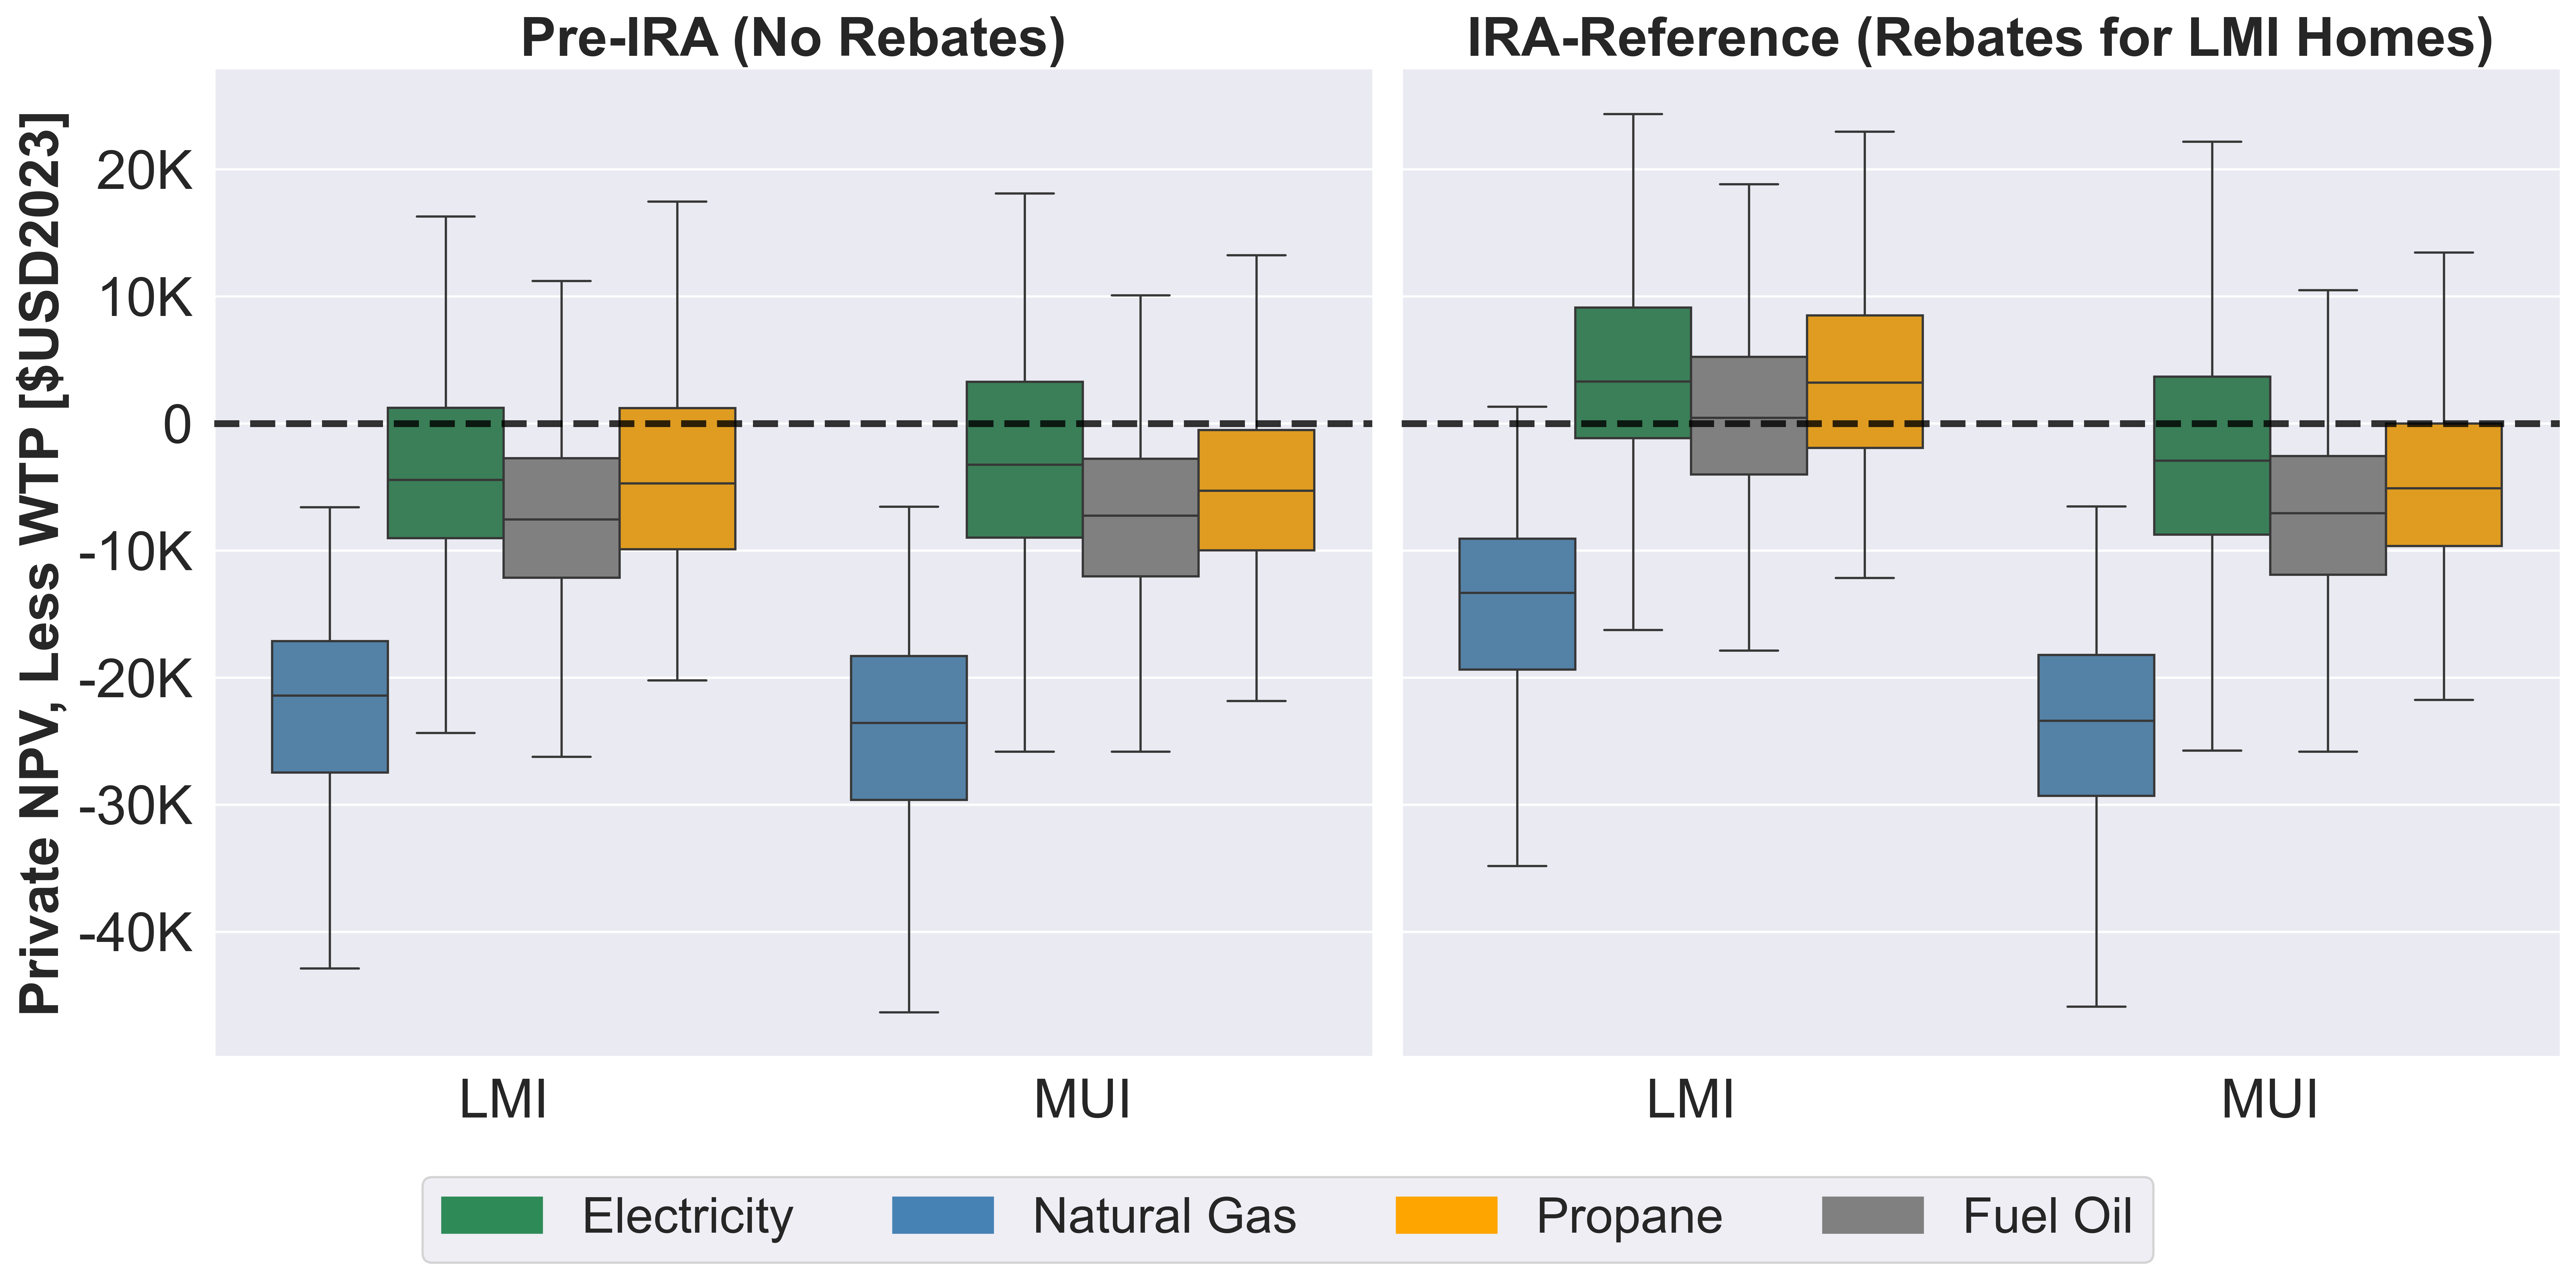

In [31]:
fig_HEATING_private_less_WTP_lmi = create_subplot_grid_boxplot(
    dataframes=[df_outputs_basic_home_inmap, df_outputs_basic_home_inmap],
    subplot_positions=[(0, 0), (0, 1)],
    y_cols=[
        f'preIRA_mp8_{category}_private_npv_lessWTP',
        f'iraRef_mp8_{category}_private_npv_lessWTP',
    ],
    category_col='lmi_or_mui',
    hue_col=f'base_{category}_fuel',
    sharex=True,
    sharey=True,
    subplot_titles=['Pre-IRA (No Rebates)', 'IRA-Reference (Rebates for LMI Homes)'],
    x_labels=['', ''],
    y_labels=['Private NPV, Less WTP [$USD2023]', ''],
    figure_size=(16, 8),
    show_outliers=False,
)

fig_HEATING_private_less_WTP_lmi

# Model Runtime

In [32]:
# Get the current datetime again
end_time = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

# Calculate the elapsed time
elapsed_time = datetime.strptime(end_time, "%Y-%m-%d_%H-%M-%S") - datetime.strptime(start_time, "%Y-%m-%d_%H-%M-%S")

# Format the elapsed time
elapsed_seconds = elapsed_time.total_seconds()
elapsed_minutes = int(elapsed_seconds // 60)
elapsed_seconds = int(elapsed_seconds % 60)

# Print the elapsed time
print(f"The code took {elapsed_minutes} minutes and {elapsed_seconds} seconds to execute.")

The code took 16 minutes and 50 seconds to execute.
